In [3]:
# Required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
warnings.filterwarnings('ignore')

In [4]:
chipo = pd.read_csv("D:\Desktop\Chipotle\chipotle.csv", sep="\t")

In [5]:
# Checking first 10 row of our data
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


## What is the number of observations in the dataset?

In [6]:
# Checking the rows in our data 
chipo.shape[0] 

4622

In [7]:
# Checking the columns in our data 
chipo.shape[1]

5

In [8]:
# Printing the columns name 
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [9]:
chipo.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

### Observation 

We don't have null values whatsoever but there is some values missing in "choice_description"
Which cant be treated as Null values they are just customer prefrences to not add any choice 
over there food

## Which was the most-ordered item?


In [10]:
# Checking the most orderd dish in our menu 
chipo['item_name'].value_counts().head(5) 

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

### Observation 

1) Above we get top 5 most-ordered item

2) The most-ordered item in our data is "Chicken Bowl"

3) For the most oredered item chicken bowl oredered about 726 units


#### ~



### What was the most ordered item in the choice_description column?


In [11]:
# choice_description is unstructered
chipo['choice_description'].values[5]

'[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]'

In [12]:
# Before moving further we have to fix the col using ast
# Below code ensures we skip missing values and make literal or list of list or just list

Choice_des = []

for i in chipo['choice_description']:
    if pd.notna(i): 
        try:
            Choice_des.append(ast.literal_eval(i))

        except (ValueError,SyntaxError):
            Choice_des.append([i])
    else:
        Choice_des.append('No Choice')

chipo['AddOn_choice']=Choice_des
chipo.head()
# print(Choice_des[:10])

,order_id,quantity,item_name,choice_description,item_price,AddOn_choice
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,No Choice
1,1,1,Izze,[Clementine],$3.39,[[Clementine]]
2,1,1,Nantucket Nectar,[Apple],$3.39,[[Apple]]
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,No Choice
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,"[[Tomatillo-Red Chili Salsa (Hot), [Black Bean..."


In [13]:
# We can drop choice_description 
chipo = chipo.drop(columns=['choice_description'])
chipo.head(3)

,order_id,quantity,item_name,item_price,AddOn_choice
0,1,1,Chips and Fresh Tomato Salsa,$2.39,No Choice
1,1,1,Izze,$3.39,[[Clementine]]
2,1,1,Nantucket Nectar,$3.39,[[Apple]]


In [14]:
# WE can now use explode method to make list in individual row and can check 

most_common_choice = (
    chipo.explode('AddOn_choice')['AddOn_choice'].value_counts().head(5)
)

print(most_common_choice)

No Choice                                                                 1246
[Diet Coke]                                                                134
[Coke]                                                                     123
[Sprite]                                                                    77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]      42
Name: AddOn_choice, dtype: int64


## Observation

1) Most of the customer go without any addons 
2) But we can say Diet Coke is the most orederd item in addons
3) Top 3 are coldrinks diet coke, Coke, Sprite

# ~



## How many items were orderd in total?

In [15]:
# Lets check detailed items and counts 
chipo.groupby('item_name').sum()

,order_id,quantity
item_name,,
6 Pack Soft Drink,52322,55
Barbacoa Bowl,53972,66
Barbacoa Burrito,74718,91
Barbacoa Crispy Tacos,5613,12
Barbacoa Salad Bowl,9708,10
Barbacoa Soft Tacos,18725,25
Bottled Water,175944,211
Bowl,472,4
Burrito,1550,6


In [16]:
# Calculating total item solds as per our unit 

chipo['quantity'].sum()

4972

## Observation

Totaly we sold 4972 items including cold drinks , dish etc. But Chicken bowl is the star dish

# ~
#### Turn the item price into a float

In [17]:
# Observation:- We cant directly convert price into float because it has ($) sign 
# We have to get rid of that $ sign then we can convert it into a float
# Below code will match pattern and rid of $ sign and convert it into float
chipo['item_price']= chipo['item_price'].str.replace('$',"",regex=True).astype(float)

print(chipo['item_price'].head(3))
print(chipo['item_price'].dtype)

0    2.39
1    3.39
2    3.39
Name: item_price, dtype: float64
float64


### How much was the revenue for the period in the dataset?

In [18]:
# Lets calculate the revenue we made
chipo['item_price'].sum()
# We have generated revenue around $34500.16 

34500.16

### How many orders were made in the period?

In [19]:
# Lets count how many oreder we completed 
chipo['item_name'].count()
# We have made around 4622 orders

4622

### What is the average revenue amount per order?

In [20]:
# Lets check how much customer are paying averagly 
# Before that lets check if there are any outlier in price column
# According to that we can decide which mehtod we will go for (mean,median)
chipo['item_price'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

In [21]:
# looks like some amount are extreme in price col let's use median 
chipo['item_price'].median()
# So averagely our customer are paying 8.75 $ 

8.75

### How many different items are sold?

In [22]:
# Lets find out how many diffrent items are sold
unique_items = chipo['item_name'].unique()
print(len(unique_items))
# There are 50 diffrent items which are sold


50


# Data Visualisation

### Create a bar chart of top 10 most-ordered items.


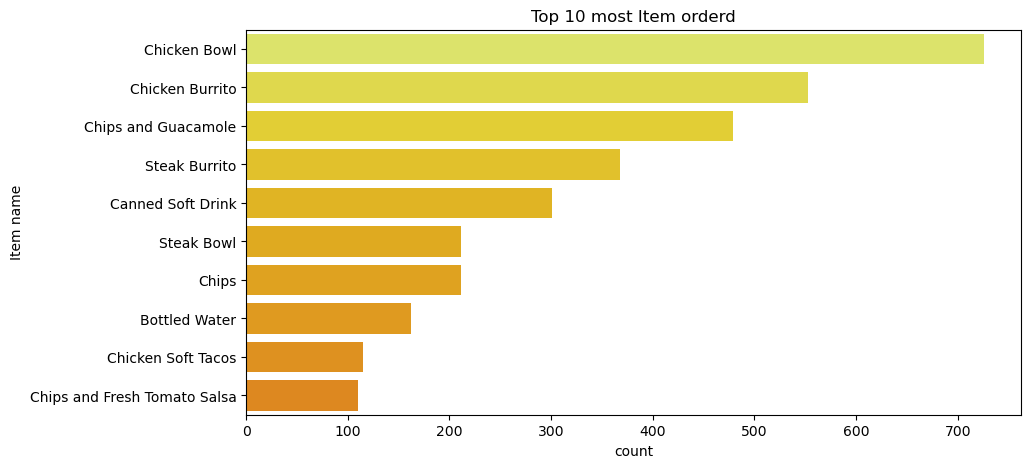

In [45]:
# Let's get only top 10 performers and make it series 
top_10_item = chipo['item_name'].value_counts().head(10)

# Now we have to covert the series into data frame 
top_10_item = top_10_item.reset_index()
top_10_item.columns = ['item_name','count']

# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(data=top_10_item,x='count',y='item_name', palette='Wistia')

plt.title('Top 10 most Item orderd')
plt.xlabel('count')
plt.ylabel('Item name')
plt.show()


### Create a pie chart showing the proportion of different choice_description categories.

In [ ]:
unique_data = set()
for i in chipo['AddOn_choice']:
    print(i)

#print(unique_data)

## Identify high-revenue generating items

In [85]:
# Lets check which item is getting more revenue
item_revenue = chipo.groupby('item_name')['item_price'].sum()
# Top 10 most generating revenue items
item_revenue = item_revenue.sort_values(ascending=False).head(10)

# Lets change it into data frame so we can visualize it
item_revenue = item_revenue.reset_index()
item_revenue.columns =['Item_name','Revenue_generated']


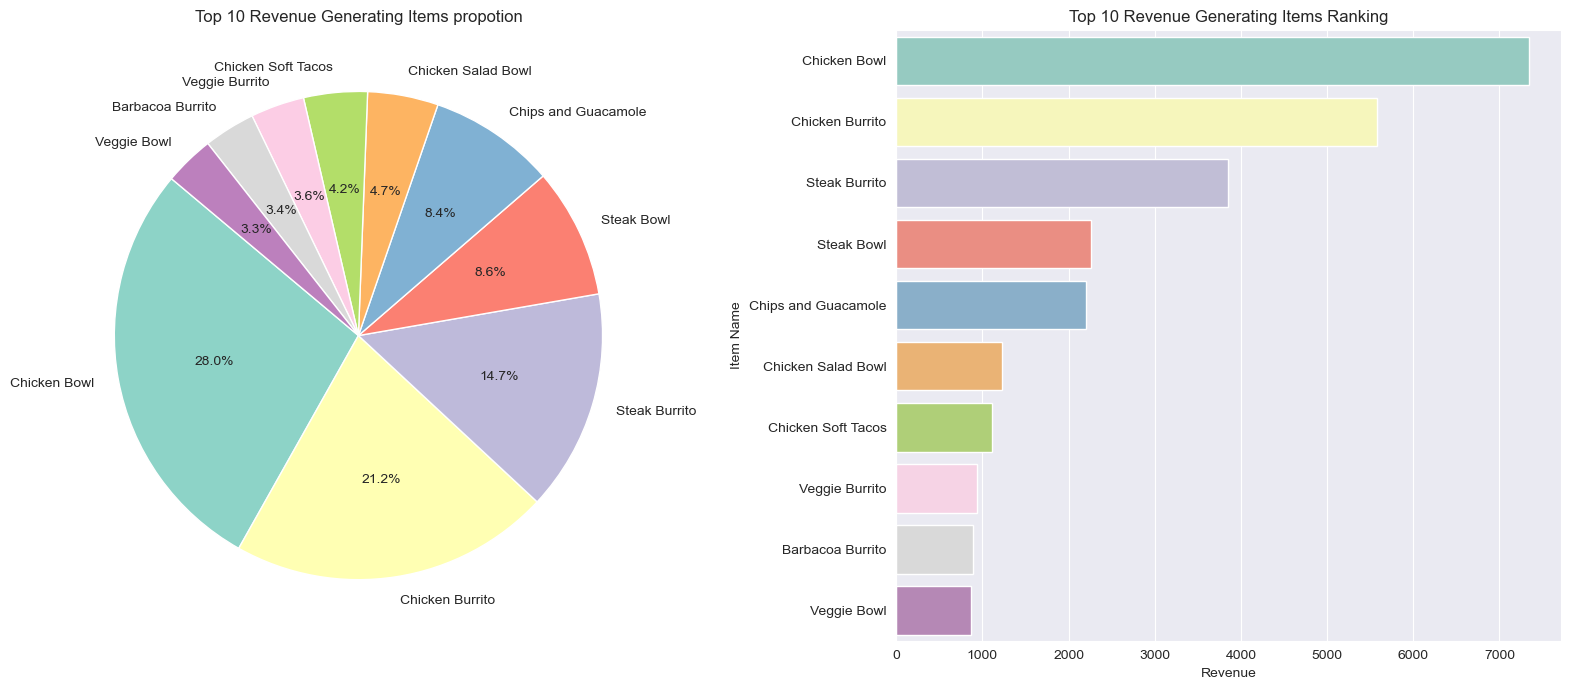

In [ ]:
# Am generating 2 plot pie(for propotion) and bar plot for ranking purpose
colors = sns.color_palette("Set3", n_colors=10)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))  # 1 row, 2 columns

# --- Pie Chart ---
axes[0].pie(
    item_revenue['Revenue_generated'],
    labels=item_revenue['Item_name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
axes[0].set_title("Top 10 Revenue Generating Items propotion")

# --- Bar Chart ---
sns.barplot(
    x='Revenue_generated',
    y='Item_name',
    data=item_revenue,
    palette=colors,
    ax=axes[1]
)
axes[1].set_title("Top 10 Revenue Generating Items Ranking")
axes[1].set_xlabel("Revenue")
axes[1].set_ylabel("Item Name")

plt.tight_layout()
plt.show()

# **Business Insights Report**

1) To identify the most profitable items, we need food costing data (raw material cost, preparation cost, etc.). This will help us determine which items yield higher margins (high selling price + low cost).

2) The most selling item is **Chicken Bowl**, and the most popular add-ons are Diet Coke / Coke. We can Creat a combo deal (e.g., Chicken Bowl + Diet Coke) with a slightly higher price could:

    a) Increase average order value (AOV)

    b) Drive higher revenue without discouraging customers

3) Once food costing data is available, we can:

    a) Identify low-cost, high-price items

    b) Bundle them into combos or promote them through discounts,This would improve overall profit margins

4) By analyzing time-of-day, day-of-week, and seasonal sales trends, we can:

    a) Forecast sales 📈

    b) Optimize manpower scheduling 👨‍🍳👩‍🍳

    c) Manage inventory and supply chain better 🚚

💡 Additional Suggestions

Customer Segmentation: Analyze purchase behavior (e.g., frequent buyers vs. one-time customers) to design loyalty programs.

Menu Engineering: Classify items into:

⭐ Stars (high profit, high sales)

💤 Sleepers (low sales, low profit)

🚀 Opportunities (low cost, high margin, but under-promoted)

Cross-Selling: Suggest add-ons like chips, salsa, or extra toppings when a customer buys high-demand items.

Dynamic Pricing: Experiment with slightly higher prices during peak demand times (lunch/dinner rush) if acceptable to customers.

Customer Feedback Integration: Link item sales with ratings/reviews to promote items that are both profitable and well-liked.